In [1]:
!pip install tslearn

     |████████████████████████████████| 862 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 34.6 MB 10.3 MB/s eta 0:00:01    |███████████████▏                | 16.4 MB 8.5 MB/s eta 0:00:03     |████████████████████▍           | 22.0 MB 2.4 MB/s eta 0:00:06     |███████████████████████▎        | 25.3 MB 12.7 MB/s eta 0:00:01


In [3]:
!pip install h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.preprocessing import TimeSeriesResampler
from tslearn.datasets import CachedDatasets

     |████████████████████████████████| 4.5 MB 4.5 MB/s eta 0:00:01


Data importation 

In [4]:
X_train, y_train,X_test,y_test = CachedDatasets().load_dataset("Trace")
X = X_train[y_train < 4]  # Keep first 3 classes
y=y_train[y_train < 4]

In [5]:
y_train < 4

array([ True,  True, False,  True,  True, False, False,  True,  True,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True])

In [6]:
# Keep only 50 time series and rescale
X = TimeSeriesScalerMeanVariance().fit_transform(X[:50])
# Make time series shorter
X = TimeSeriesResampler(sz=40).fit_transform(X)

In [7]:
X.shape

(50, 40, 1)

In [8]:
X[[0, 1, 3], :]

array([[[ 5.45060781e-01],
        [ 5.39906279e-01],
        [ 5.93328047e-01],
        [ 6.09289896e-01],
        [ 6.11954228e-01],
        [ 5.93899342e-01],
        [ 6.41750467e-01],
        [ 6.74291954e-01],
        [ 5.49388395e-01],
        [-1.98289116e+00],
        [-1.90712003e+00],
        [-1.87084380e+00],
        [-1.73417731e+00],
        [-1.64816448e+00],
        [-1.53160892e+00],
        [-1.36230102e+00],
        [-1.06268434e+00],
        [-8.10947561e-01],
        [-6.32431373e-01],
        [-3.49740349e-01],
        [-5.43344832e-02],
        [ 4.43730004e-02],
        [ 1.56633876e-01],
        [ 3.34719280e-01],
        [ 3.84388583e-01],
        [ 4.55002129e-01],
        [ 4.86036773e-01],
        [ 5.28536884e-01],
        [ 5.49572576e-01],
        [ 5.67344640e-01],
        [ 5.79535785e-01],
        [ 5.69433053e-01],
        [ 5.82651451e-01],
        [ 5.96370246e-01],
        [ 5.43345097e-01],
        [ 6.05964617e-01],
        [ 5.84414657e-01],
 

Visualisation

<AxesSubplot: title={'center': 'Time series from the Trace dataset'}>

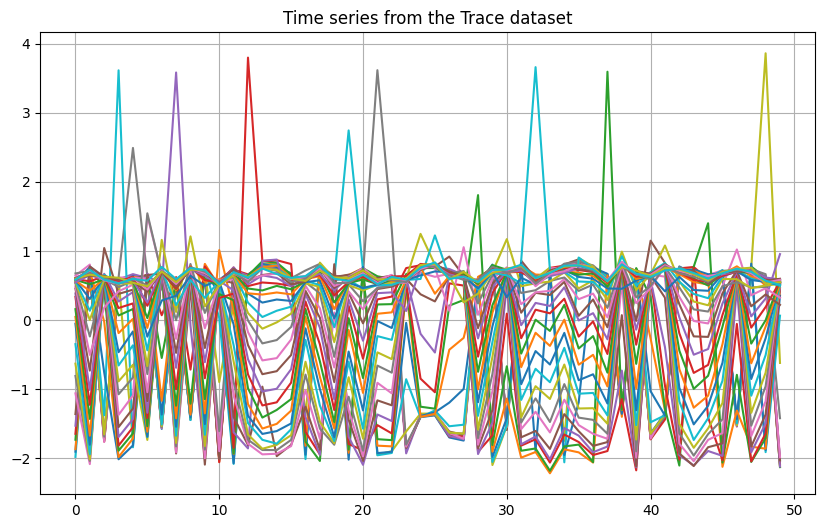

In [9]:
X_array=X[:,:,0]
df=pd.DataFrame(X_array)
df.plot(legend=0, figsize=(10,6), grid=True, title='Time series from the Trace dataset')

Euclidean k means

In [10]:
km = TimeSeriesKMeans(n_clusters=3, verbose=True)
y_pred = km.fit_predict(X)

13.945 --> 8.934 --> 8.315 --> 7.846 --> 7.811 --> 7.811 --> 


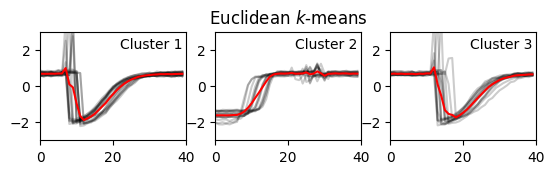

In [11]:
plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 40)
    plt.ylim(-3, 3)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

DTW

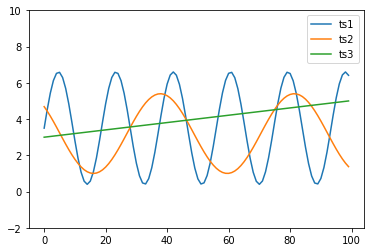

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x=np.linspace(0,50,100)
ts1=pd.Series(3.1*np.sin(x/1.5)+3.5)
ts2=pd.Series(2.2*np.sin(x/3.5+2.4)+3.2)
ts3=pd.Series(0.04*x+3.0)

ts1.plot()
ts2.plot()
ts3.plot()

plt.ylim(-2,10)
plt.legend(['ts1','ts2','ts3'])
plt.show()

In [ ]:
def euclid_dist(t1,t2):
    return np.sqrt(sum((t1-t2)**2))

In [ ]:
print([euclid_dist(ts1,ts2),euclid_dist(ts1,ts3)])

[26.959216037969345, 23.189249190311056]


In [ ]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [ ]:
print([DTWDistance(ts1,ts2),DTWDistance(ts1,ts3)])

[17.929718468641138, 21.549494824404572]


With tslearn

In [ ]:
from tslearn.metrics import dtw
print([dtw(ts1,ts2),dtw(ts1,ts3)])

[17.929718468641138, 21.549494824404572]


K means clustering with DTW

In [ ]:
km_dtw = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
y_pred_dtw=km_dtw.fit(X)

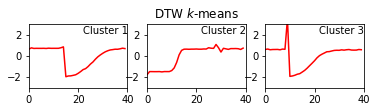

In [ ]:
plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X[y_pred_dtw == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.5)
    plt.plot(km_dtw.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, 40)
    plt.ylim(-3, 3)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

Hierarchical clustering

In [ ]:
n_series =50
distance_DTW=np.zeros((n_series,n_series))
for i in range(n_series):
  for j in range(n_series):
    x=X[i,:,0]
    y=X[j,:,0]
    if i!=j:
      distance_DTW[i,j]=dtw(x,y)

In [ ]:
from scipy.cluster.hierarchy import ward,dendrogram
linkage_matrix=ward(distance_DTW)

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b'],
 'dcoord': [[0.0, 0.5912346025458987, 0.5912346025458987, 0.0],
  [0.0, 0.9519958944902515, 0.9519958944902515, 0.5912346025458987],
  [0.0, 0.6890605833937119, 0.6890605833937119, 0.0],
  [0.0, 0.6712439304060257, 0.6712439304060257, 0.0],
  [0.0, 1.0292409720501372, 1.0292409720501372, 0.6712439304060257],
  [0.6890605833937119,
   1.8519519571937897,
   1.8519519571937897,
   1.0292409720501372],
  [0.9519958944902515,
   5.289833714751364,
   5.289833714751364,
   1.8519519571937897],
  [0.0, 0.8121999086206774, 0.8121999086206774, 0.0],
  [0.0, 0.898501933433643, 0.898501933433643, 0.8121999086206774],
  [0.0, 1.156526641118926, 

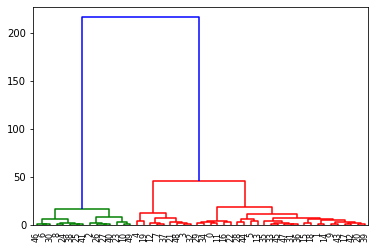

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
dendrogram(linkage_matrix)